
# **Written by**: Abdullah Riaz

## **Date**: 29.04.2024

## **Email**: abdullah.riaz.ar.98@gmail.com

In [3]:
# Importing libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The purpose of this is to create a program which can predict a specie of flower by providing it sepal length, sepal width, petal length and petal width of flower.

##### First we load the dataset

In [4]:
# loading and viewing data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Statics of dataset:

In [13]:
# Summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Getting informstion about type of data stored in dataset

In [6]:
# Column names
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### Knowing the total number of Columns and Rows of dataset

In [7]:
df.shape

(150, 5)

#### Following is the code to know about type of data stored across each column and number non zero values in each column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [14]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

##### Assigning the target variable for multi linear regression

In [29]:
# Preparing X and y axes for applying multi linear aggression
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
y = df['species'] 

##### Checking the number of null values across X and y

In [18]:
# finding if X has any null values
X.isnull().sum() / len(X) * 100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64

In [19]:
# finding if y has any null values
y.isnull().sum() / len(X) * 100

species    0.0
dtype: float64

##### Boxplot for checking the outliers

<Axes: ylabel='sepal_width'>

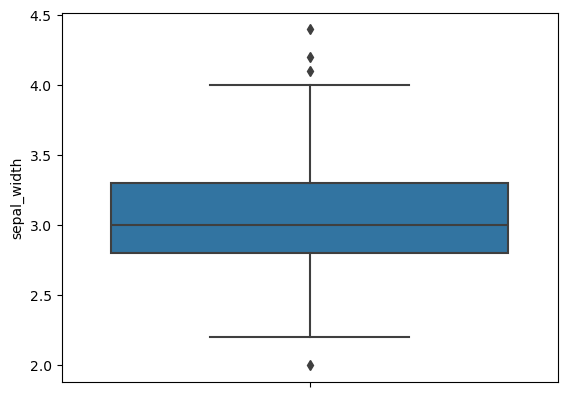

In [46]:
sns.boxplot(data= df, y= 'sepal_width')

<Axes: ylabel='sepal_length'>

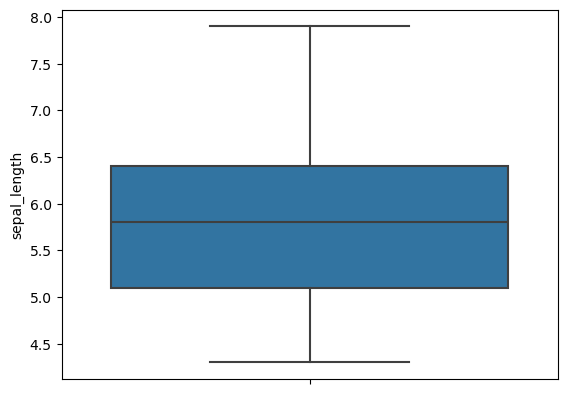

In [47]:
sns.boxplot(data= df, y= 'sepal_length')

In [48]:
df = df[(df['sepal_width']>2.22) & (df['sepal_width']<4)]

<Axes: ylabel='sepal_width'>

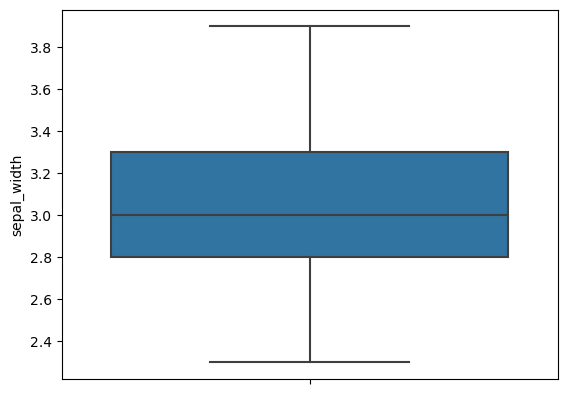

In [49]:
sns.boxplot(data= df, y= 'sepal_width')

#### Lmplot for visulaing linear relationship, identifying patterns and comparing groups

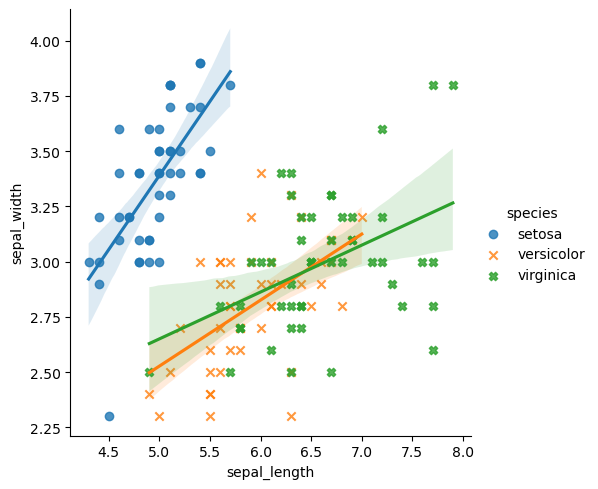

In [50]:
sns.lmplot(x='sepal_length', y='sepal_width', data=df, hue='species', markers=['o', 'x', 'X'])

#### Starting Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder
label_encoder = LabelEncoder()

# The target value should be a numeric value instead of categorial otherwise it will give error
# Encode the target variable 'species'
y_encoded = label_encoder.fit_transform(y)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y_encoded)

LinearRegression()

In [57]:
df['y_encoded'] = pd.factorize(df['species'])[0]

C:\Users\abdul\AppData\Local\Temp\ipykernel_10920\1847636060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_encoded'] = pd.factorize(df['species'])[0]


#### Lmplot after encoding of values along y

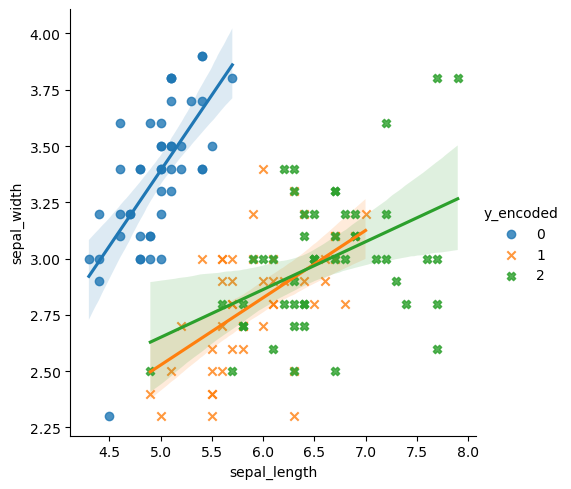

In [113]:

sns.lmplot(x='sepal_length', y='sepal_width', data=df, hue='y_encoded', markers=['o', 'x', 'X'])

In [65]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,y_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


##### Saving the data

In [67]:
df.to_excel('flower.xlsx')

#### Prediciting the Values

In [93]:
# Predicting the specie by providing it different lengths of flower petal
model.predict([[6.5,3.2,5.1,2.2]])

c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.837297])

#### Checking accuracy of the model

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, 	y_encoded, train_size=0.8)
# model
model = LinearRegression()
#train
model.fit(X_train, y_train)
# prediction
model.predict(X_test)
#predictions
predictions = model.predict(X_test)

<Axes: >

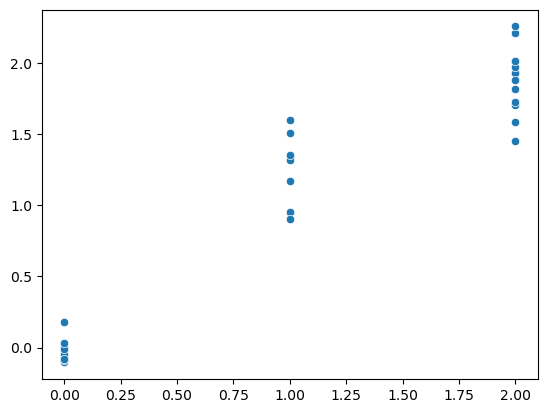

In [103]:
sns.scatterplot(x = y_test, y =predictions)

In [104]:
model.score(X_test, y_test)

0.9132332529514806

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MAE = mean_absolute_error(y_true=y_test, y_pred= predictions)

MSE = mean_squared_error(y_true=y_test, y_pred= predictions)

RMSE = mean_squared_error(y_true=y_test, y_pred= predictions, squared= True) #␣popular for researcch

R2 = r2_score(y_true=y_test, y_pred= predictions)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Square Erroe:', RMSE)
print('R2:', R2)


Mean Absolute Error: 0.18534423058345387
Mean Squared Error: 0.06208642788805167
Root Mean Square Erroe: 0.06208642788805167
R2: 0.9132332529514806
